In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wfdb

In [2]:
diretorio = '/home/matheus/Documentos/Facul/IC/ECG_classification/data/'

In [19]:
# Lista com os códigos que precisamos
codigo = [426783006] 

# Lista dos leads
leads = [0]

In [20]:
data_frame = pd.read_csv('../datasets/Total.csv')
data_frame

,fs,sig_len,n_sig,base_date,base_time,units,sig_name,Age,Sex,Dx,Rx,Hx,Sx,arquivos,base
0,500,5000,1,NaN,00:00:24,['mV'],['II'],47.0,Female,426177001,Unknown,Unknown,Unknown,JS04442,WFDB_ChapmanShaoxing
1,500,5000,1,NaN,00:00:23,['mV'],['II'],41.0,Female,426177001,Unknown,Unknown,Unknown,JS00992,WFDB_ChapmanShaoxing
2,500,5000,1,NaN,00:00:23,['mV'],['II'],68.0,Female,427084000,Unknown,Unknown,Unknown,JS02338,WFDB_ChapmanShaoxing
3,500,5000,1,NaN,00:00:23,['mV'],['II'],41.0,Female,426177001,Unknown,Unknown,Unknown,JS01381,WFDB_ChapmanShaoxing
4,500,5000,1,NaN,00:00:23,['mV'],['II'],70.0,Male,426177001,Unknown,Unknown,Unknown,JS02487,WFDB_ChapmanShaoxing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158334,257,462600,1,NaN,00:00:15,['mv'],['II'],59.0,Female,251170000,Unknown,Unknown,Unknown,I0020,WFDB_StPetersburg
158335,257,462600,1,NaN,00:00:15,['mv'],['II'],73.0,Male,164873001,Unknown,Unknown,Unknown,I0072,WFDB_StPetersburg
158336,257,462600,1,NaN,00:00:15,['mv'],['II'],73.0,Male,53741008,Unknown,Unknown,Unknown,I0072,WFDB_StPetersburg
158337,257,462600,1,NaN,00:00:15,['mv'],['II'],73.0,Male,427084000,Unknown,Unknown,Unknown,I0072,WFDB_StPetersburg


In [21]:
# Cria tabela com apenas os códigos necessários
df = pd.DataFrame(columns= ['arquivos', 'base', 'Dx'])
for x in range(len(codigo)):
    df = df.append(data_frame.loc[lambda data_frame: data_frame['Dx'] == codigo[x]])


In [22]:
len(df.loc[lambda df: df['sig_len'] < 5000])


0

In [23]:
df.loc[lambda df: df['sig_len'] < 5000]

,arquivos,base,Dx,fs,sig_len,n_sig,base_date,base_time,units,sig_name,Age,Sex,Rx,Hx,Sx


In [10]:
# df = df.drop([28921])

In [24]:
df = df.reset_index()
df.drop(columns= 'index', inplace= True)
df


,arquivos,base,Dx,fs,sig_len,n_sig,base_date,base_time,units,sig_name,Age,Sex,Rx,Hx,Sx
0,JS04718,WFDB_ChapmanShaoxing,426783006,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],54.0,Male,Unknown,Unknown,Unknown
1,JS01121,WFDB_ChapmanShaoxing,426783006,500.0,5000.0,1.0,NaN,00:00:23,['mV'],['II'],63.0,Female,Unknown,Unknown,Unknown
2,JS07280,WFDB_ChapmanShaoxing,426783006,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],55.0,Female,Unknown,Unknown,Unknown
3,JS03292,WFDB_ChapmanShaoxing,426783006,500.0,5000.0,1.0,NaN,00:00:23,['mV'],['II'],79.0,Male,Unknown,Unknown,Unknown
4,JS05283,WFDB_ChapmanShaoxing,426783006,500.0,5000.0,1.0,NaN,00:00:24,['mV'],['II'],58.0,Female,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27214,HR17356,WFDB_PTBXL,426783006,500.0,5000.0,1.0,NaN,00:00:04,['mv'],['II'],74.0,Male,Unknown,Unknown,Unknown
27215,HR21317,WFDB_PTBXL,426783006,500.0,5000.0,1.0,NaN,00:00:04,['mv'],['II'],47.0,Male,Unknown,Unknown,Unknown
27216,HR08591,WFDB_PTBXL,426783006,500.0,5000.0,1.0,NaN,00:00:04,['mv'],['II'],64.0,Male,Unknown,Unknown,Unknown
27217,HR15622,WFDB_PTBXL,426783006,500.0,5000.0,1.0,NaN,00:00:04,['mv'],['II'],18.0,Female,Unknown,Unknown,Unknown


In [25]:
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
#Cria a tabela dos records
records = pd.DataFrame()

In [32]:
# Capturar os 300 primeiros
for x in range(300):
    destino = diretorio + df.loc[x]['base'] + '/' + df.loc[x]['arquivos']

    record, fields = wfdb.rdsamp(destino, channels = leads, sampto= 5000)
        
    # Colocar o record em uma data_frame Junto com seu código
    aux = pd.DataFrame(record.transpose())
    # Inserir a linha com o nome da arritmia
    aux['arritmia'] = int(df.loc[x]['Dx'])
    # Inserir coluna de leads
    aux['leads'] = leads
    # Inserir a coluna com nome do arquivo
    aux['arquivo'] = df.loc[x]['arquivos']
    records = records.append(aux)

In [33]:
records

,0,1,2,3,4,5,6,7,8,9,...,4993,4994,4995,4996,4997,4998,4999,arritmia,leads,arquivo
0,-0.100,-0.100,-0.100,-0.100,-0.100,-0.100,-0.099,-0.104,-0.102,-0.093,...,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,426783006,0,HR13504
0,-0.220,-0.220,-0.220,-0.220,-0.221,-0.220,-0.201,-0.181,-0.171,-0.152,...,0.005,0.005,0.005,0.005,0.005,0.005,0.005,426783006,0,HR21191
0,-0.035,-0.035,-0.035,-0.035,-0.035,-0.035,-0.036,-0.033,-0.044,-0.055,...,-0.090,-0.090,-0.090,-0.090,-0.090,-0.090,-0.090,426783006,0,HR18986
0,-0.240,-0.240,-0.240,-0.240,-0.241,-0.240,-0.228,-0.220,-0.221,-0.227,...,0.075,0.075,0.075,0.075,0.075,0.075,0.075,426783006,0,HR06445
0,-0.055,-0.055,-0.055,-0.055,-0.055,-0.055,-0.063,-0.065,-0.067,-0.071,...,0.045,0.045,0.045,0.045,0.045,0.045,0.045,426783006,0,HR13100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,-0.085,-0.085,-0.085,-0.085,-0.085,-0.085,-0.093,-0.098,-0.102,-0.105,...,0.050,0.050,0.050,0.050,0.050,0.050,0.050,426783006,0,HR19209
0,0.020,0.020,0.020,0.020,0.021,0.020,0.005,-0.015,-0.019,-0.025,...,-0.130,-0.130,-0.130,-0.130,-0.130,-0.130,-0.130,426783006,0,HR14750
0,0.025,0.025,0.025,0.025,0.025,0.025,0.017,0.012,0.007,0.005,...,0.010,0.010,0.010,0.010,0.010,0.010,0.010,426783006,0,HR04220
0,-0.029,-0.044,-0.049,-0.054,-0.063,-0.059,-0.034,-0.044,-0.059,-0.039,...,0.078,0.044,-0.024,-0.059,-0.156,-0.020,0.078,426783006,0,JS11558


In [34]:
records.to_csv('records1.csv')

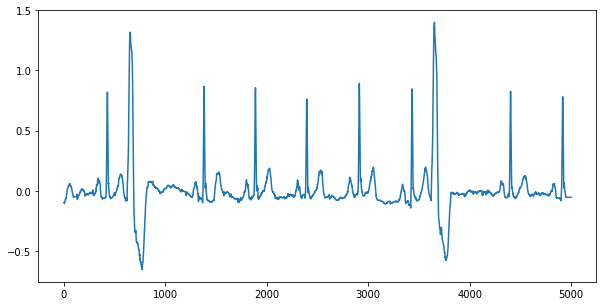

In [35]:
plt.figure(figsize=(10,5))
plt.plot(records.iloc[0][:-3])